In [1]:
import numpy as np
import os, pickle
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import matplotlib

## Make Notebook 80% screen width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Window plot
# %matplotlib qt

font = {'size'   : 14}

matplotlib.rc('font', **font)

In [8]:
## Functions to plot various kind of graphs

keys = ['d1', 'd2', 'd3', 'EPE']
unit = [ '%',  '%',  '%',  'px']

# keys = ['d1', 'EPE', 'd2', 'd3']
# unit = [ '%', 'px', '%',  '%']

d2in = {'kitti12' : 0, 'kitti15' : 1, 'middleb' : 2}

def plot_individual(log, model=''):
    xrange = (np.arange( log['count'] ) + 1) * 5000
    
    kitti12, kitti15, middleb = log['content']
    
    for k in keys:
        ## Plot mean and std(as error bar, maybe not)
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

        axes[0].plot(xrange, kitti12[k][:,0], '--yo', label='kitti12')
        axes[0].plot(xrange, kitti15[k][:,0], '--bo', label='kitti15')
        axes[1].plot(xrange, middleb[k][:,0], '--ro', label='middleb')
        # fig.tight_layout()

        axes[0].set_title("KITTI 2012 & 2015 " + k + " loss")
        axes[1].set_title("Middlebury "        + k + " loss")
        for a in axes:
            a.grid()
            a.legend()
            a.set_xlabel('steps trained')
            a.set_ylabel( k +' loss')
        plt.title(model)
        plt.show()
        
def plot_multiple(logs, names):
    assert len(logs) == len(names)
    
    for k, u in zip(keys, unit):
        ## Plot mean and std(as error bar, maybe not)
        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24,4))
        
        for log, name in zip(logs, names):
            xrange = (np.arange( log['count'] ) + 1) * 5
            kitti12, kitti15, middleb = log['content']    

            axes[0].plot(xrange, kitti12[k][:,0], '--+', label='kitti12 ' + name)
            axes[1].plot(xrange, kitti15[k][:,0], '--+', label='kitti15 ' + name)
            axes[2].plot(xrange, middleb[k][:,0], '--+', label='middleb ' + name)

        axes[0].set_title("KITTI 2012 " + k.upper() + " error ")
        axes[1].set_title("KITTI 2015 " + k.upper() + " error ")
        axes[2].set_title("Middlebury " + k.upper() + " error ")
        for a in axes:
            a.grid()
            a.legend()
            a.set_xlabel('Thousand steps trained')
            a.set_ylabel( k.upper() +' error ' + u )
        plt.show()
        
def plot_single(logs, names, dataset='kitti12'):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))
       
    for i, k, u in zip(np.arange(len(keys)), keys, unit):
        for log, name in zip(logs, names):
            xrange = (np.arange( log['count'] ) + 1) * 5
            
            data = log['content'][ d2in[dataset] ]
            axes[i // 2][i % 2].plot(xrange, data[k][:,0], '--+', label=dataset.upper() + ' ' + name)
            axes[i // 2][i % 2].set_title(dataset.upper() + ' ' + k.upper() + " error ")
            axes[i // 2][i % 2].set_ylabel(k.upper() +' error ' + u)
        
    for axe in axes.flatten():
        axe.grid()
        axe.legend()
        axe.set_xlabel('Thousand steps trained')


    plt.tight_layout()
    plt.show()
        
## Parse the error log into numpy arrays
def log_parser(cberrors):
    c = len(cberrors)

    kitti12 = {'d1':[], 'd2':[], 'd3':[], 'EPE':[]}
    kitti15 = {'d1':[], 'd2':[], 'd3':[], 'EPE':[]}
    middleb = {'d1':[], 'd2':[], 'd3':[], 'EPE':[]}

    for cerror in cberrors:
        for k in keys:
            kitti12[k].append(cerror['2012'][k])
            kitti15[k].append(cerror['2015'][k])
            middleb[k].append(cerror['MIDL'][k])

    for k in keys:
        multiplier = 100
        if k == 'EPE': multiplier=1
        
        kitti12[k] = np.array(kitti12[k]) * multiplier
        kitti15[k] = np.array(kitti15[k]) * multiplier
        middleb[k] = np.array(middleb[k]) * multiplier
    
    parsed_log = { 'count'  : c,
                   'content': (kitti12,kitti15, middleb)}
        
    return parsed_log


def format_single(entry):
    for key in entry:
        print(key)
        for keys in entry[key]:
            if keys != 'EPE':
                print(keys, "{:.1f}".format(entry[key][keys][0] * 100) + '%')
            else:
                print(keys, "{:.2f}".format(entry[key][keys][0]) + 'px')

In [9]:
######################################################
## Load the error logs generated from benchmark.py

# back_log, open_log, nopv_log, inpt_log = None, None, None, None
fname = 'models/logs/'
with open(fname + 'background.pickle', 'rb') as handle: back_log = pickle.load(handle)
with open(fname +     'opencv.pickle', 'rb') as handle: open_log = pickle.load(handle)
with open(fname +    'inpaint.pickle', 'rb') as handle: inpt_log = pickle.load(handle)
# with open('opencv_new.pickle', 'rb') as handle: nopv_log = pickle.load(handle)
# with open( 'opencv_64.pickle', 'rb') as handle: open64og = pickle.load(handle)

print('Logs loaded')

Logs loaded


In [10]:
# back_log = back_log[:40]
# open_log = open_log[:40]
# inpt_log = inpt_log[:40]

In [11]:
## Parse the error logs
back_parsed = log_parser(back_log)
open_parsed = log_parser(open_log)
inpt_parsed = log_parser(inpt_log)

print('\n\tBACK')
format_single(back_log[-1])
print('\n\tOPENCV')
format_single(open_log[-1])
print('\n\tNETWORK')
format_single(inpt_log[-1])

# back_parsed = back_parsed[:40]
# open_parsed = open_parsed[:40]
# inpt_parsed = inpt_parsed[:40]

# nopv_parsed = log_parser(nopv_log)
# op64_parsed = log_parser(open64og)

## Background 2012:  51.4%, 25.4%, 14.4%, 1.97px
##            2015:  47.1%  24.5%, 15.2%, 1.94px
##            MIDD:  56.



	BACK
2012
d1 48.9%
d2 23.7%
d3 13.8%
EPE 1.91px
2015
d1 45.3%
d2 22.6%
d3 13.9%
EPE 1.86px
MIDL
d1 57.5%
d2 40.1%
d3 31.4%
EPE 5.43px

	OPENCV
2012
d1 45.9%
d2 21.0%
d3 12.0%
EPE 1.81px
2015
d1 42.9%
d2 20.9%
d3 12.7%
EPE 1.75px
MIDL
d1 54.8%
d2 38.1%
d3 30.2%
EPE 5.57px

	NETWORK
2012
d1 51.4%
d2 25.3%
d3 14.8%
EPE 2.05px
2015
d1 47.6%
d2 24.8%
d3 15.6%
EPE 1.96px
MIDL
d1 57.5%
d2 40.9%
d3 32.9%
EPE 6.78px


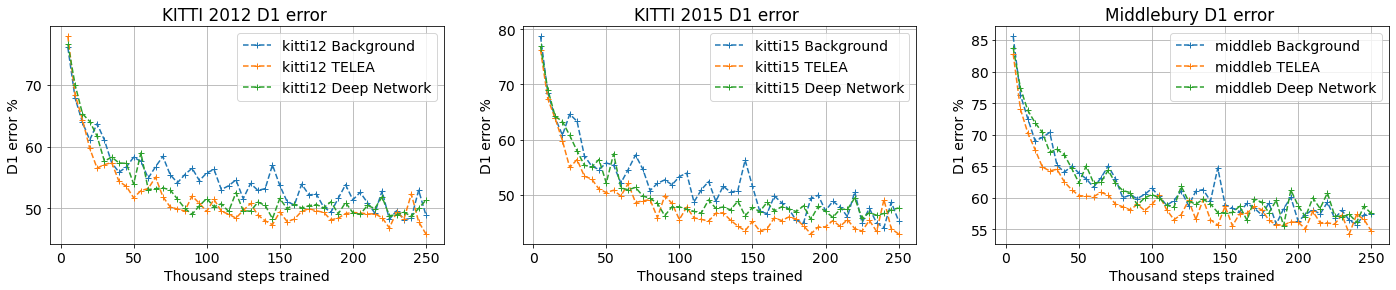

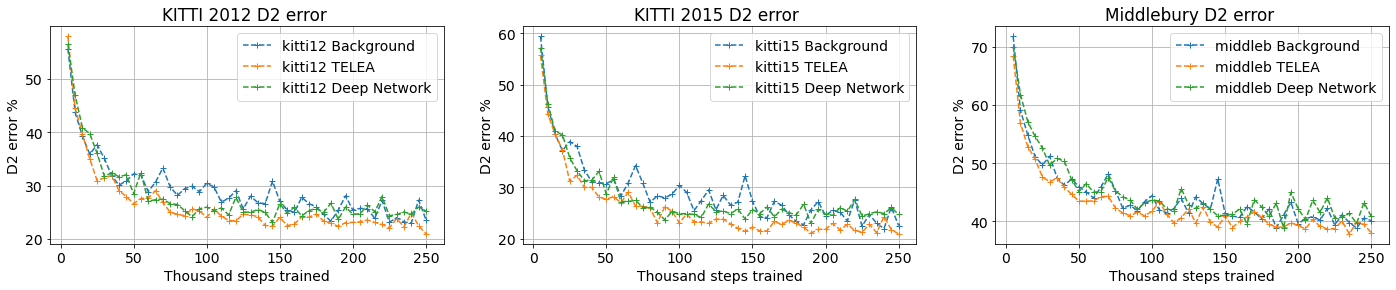

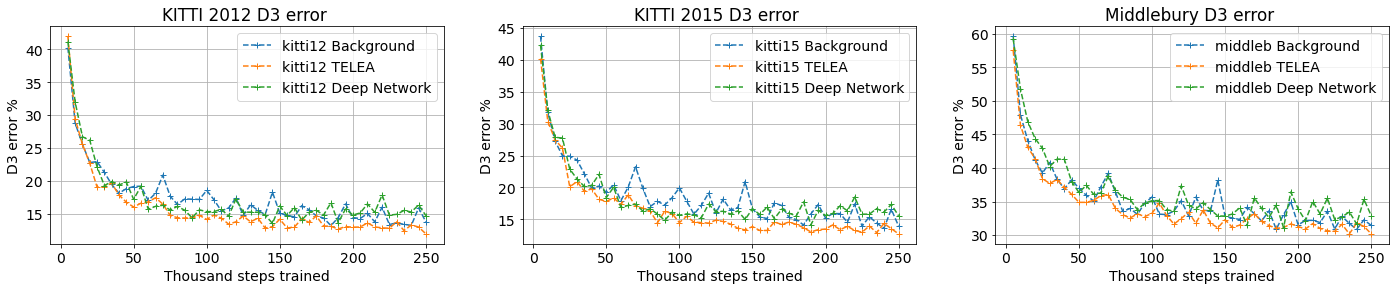

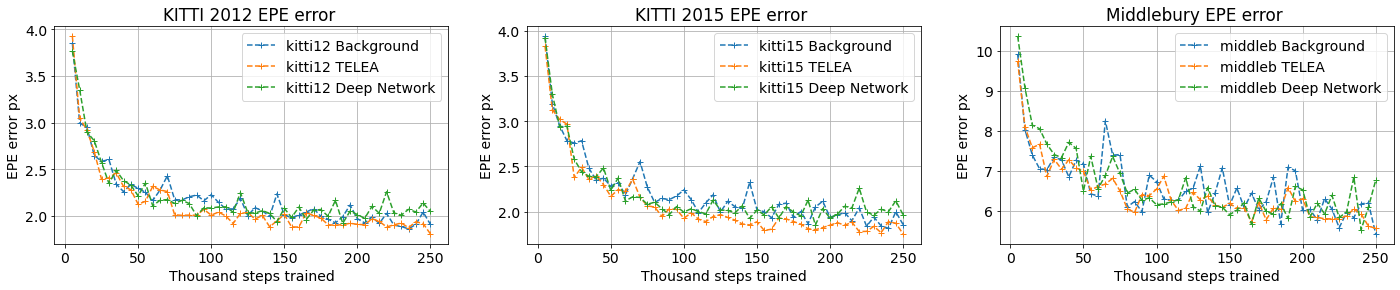

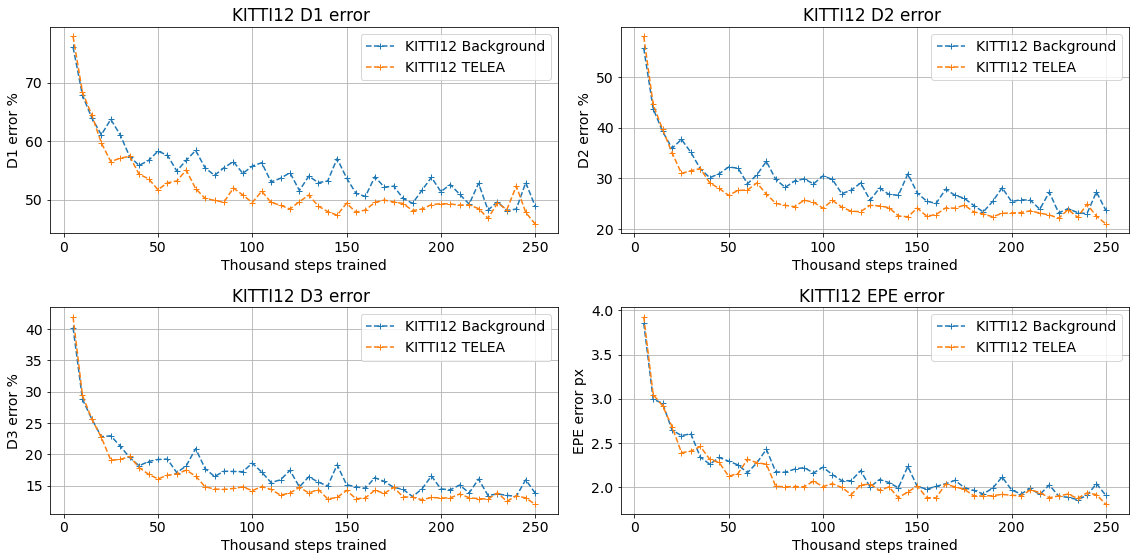

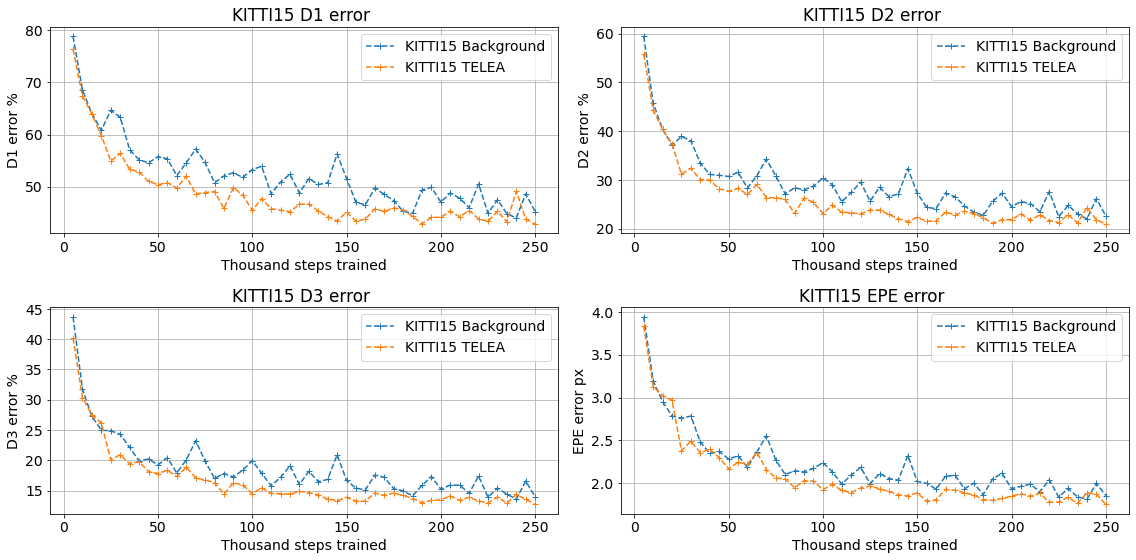

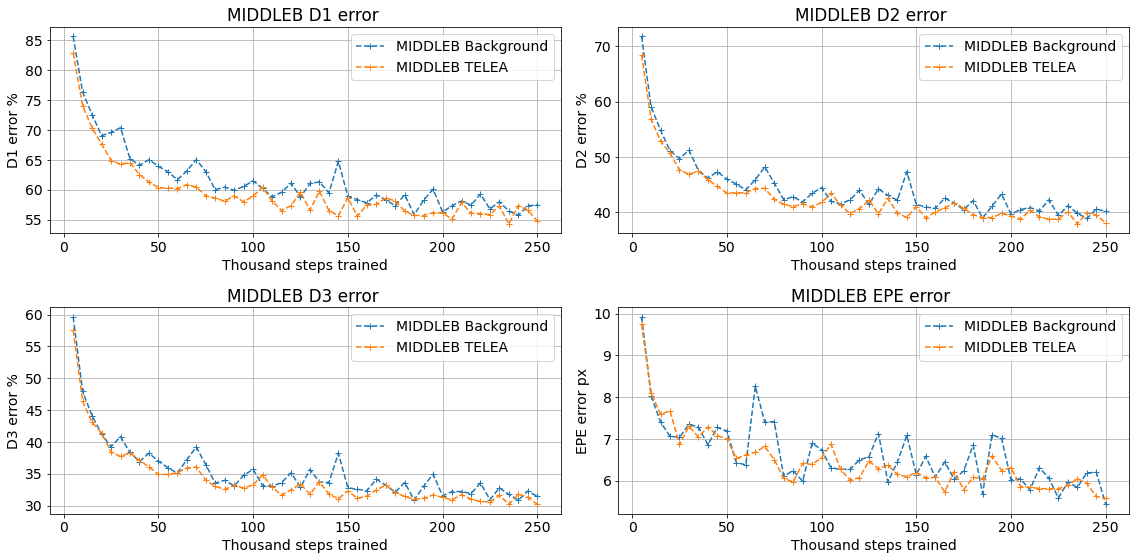

In [13]:
# plot_individual(back_parsed, 'Background filling')
# plot_individual(open_parsed,     'Opencv filling')

plot_multiple([back_parsed, open_parsed, inpt_parsed], ['Background', 'TELEA', 'Deep Network'] )

# plot_single([back_parsed, open_parsed, inpt_parsed], ['Background', 'TELEA', 'Deep Network'], dataset='kitti12')
# plot_single([back_parsed, open_parsed, inpt_parsed], ['Background', 'TELEA', 'Deep Network'], dataset='kitti15')
# plot_single([back_parsed, open_parsed, inpt_parsed], ['Background', 'TELEA', 'Deep Network'], dataset='middleb')

plot_single([back_parsed, open_parsed, inpt_parsed], ['Background', 'TELEA'], dataset='kitti12')
plot_single([back_parsed, open_parsed, inpt_parsed], ['Background', 'TELEA'], dataset='kitti15')
plot_single([back_parsed, open_parsed, inpt_parsed], ['Background', 'TELEA'], dataset='middleb')

# plot_single([back_parsed, open_parsed, inpt_parsed], ['Background', 'TELEA', 'Deep Network'], dataset='kitti12')
# plot_single([back_parsed, open_parsed, inpt_parsed], ['Background', 'TELEA', 'Deep Network'], dataset='kitti15')
# plot_single([back_parsed, open_parsed, inpt_parsed], ['Background', 'TELEA', 'Deep Network'], dataset='middleb')

# plot_single([open_parsed, op64_parsed], ['OpenCV', 'OpenCV64'], dataset='kitti12')
# plot_single([open_parsed, op64_parsed], ['OpenCV', 'OpenCV64'], dataset='kitti15')
# plot_single([open_parsed, op64_parsed], ['OpenCV', 'OpenCV64'], dataset='middleb')